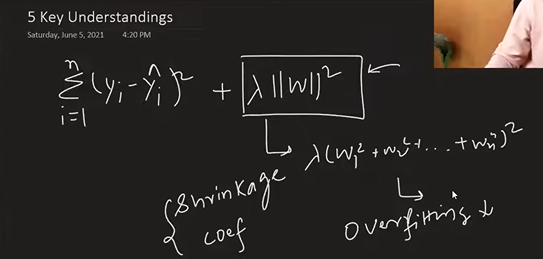

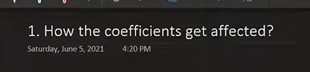

All the coefficients start shrinking towards 0.

In [1]:
from sklearn.datasets import load_diabetes

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

In [2]:
data = load_diabetes()

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)
df['TARGET'] = data.target

In [4]:
df.head()

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6,TARGET
0,0.038076,0.050680,0.061696,0.021872,-0.044223,-0.034821,-0.043401,-0.002592,0.019907,-0.017646,151.0
1,-0.001882,-0.044642,-0.051474,-0.026328,-0.008449,-0.019163,0.074412,-0.039493,-0.068332,-0.092204,75.0
2,0.085299,0.050680,0.044451,-0.005670,-0.045599,-0.034194,-0.032356,-0.002592,0.002861,-0.025930,141.0
3,-0.089063,-0.044642,-0.011595,-0.036656,0.012191,0.024991,-0.036038,0.034309,0.022688,-0.009362,206.0
4,0.005383,-0.044642,-0.036385,0.021872,0.003935,0.015596,0.008142,-0.002592,-0.031988,-0.046641,135.0


In [5]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(data.data,data.target,test_size=0.2,random_state=2)

In [6]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score

In [7]:
coefs = []
r2_scores = []

for i in [0,10,100,1000]:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())
    y_pred = reg.predict(X_test)
    r2_scores.append(r2_score(y_test,y_pred))
    
    

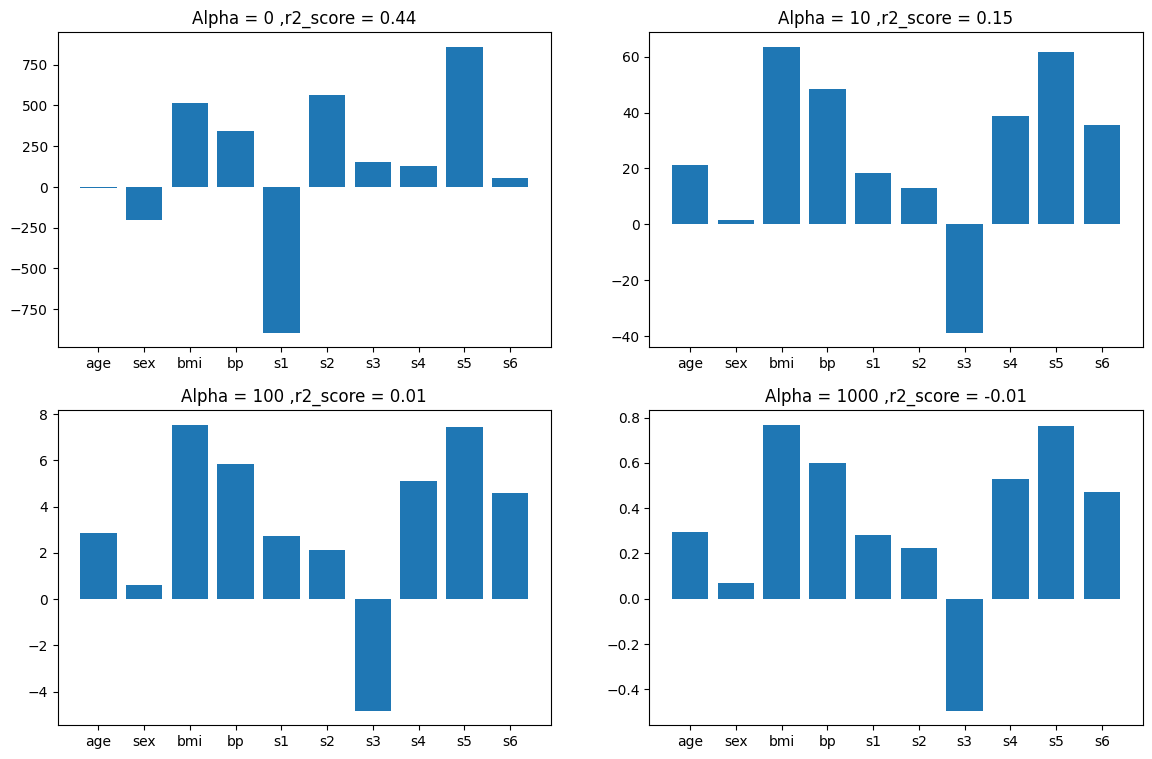

In [8]:
plt.figure(figsize=(14,9))
plt.subplot(221)
plt.bar(data.feature_names,coefs[0])
plt.title('Alpha = 0 ,r2_score = {}'.format(round(r2_scores[0],2)))

plt.subplot(222)
plt.bar(data.feature_names,coefs[1])
plt.title('Alpha = 10 ,r2_score = {}'.format(round(r2_scores[1],2)))

plt.subplot(223)
plt.bar(data.feature_names,coefs[2])
plt.title('Alpha = 100 ,r2_score = {}'.format(round(r2_scores[2],2)))

plt.subplot(224)
plt.bar(data.feature_names,coefs[3])
plt.title('Alpha = 1000 ,r2_score = {}'.format(round(r2_scores[3],2)))

plt.show()


## 2. Higher Coefficients are affected more

In [9]:
alphas = [0,0.0001,0.001,0.01,0.1,1,10,100,1000,10000]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [10]:
input_array = np.array(coefs)

In [11]:
coef_df = pd.DataFrame(input_array,columns=data.feature_names)
coef_df['alpha'] = alphas
coef_df.set_index('alpha')

,age,sex,bmi,bp,s1,s2,s3,s4,s5,s6
alpha,,,,,,,,,,
0.0000,-9.158653,-205.454322,516.693745,340.619999,-895.552002,561.220679,153.893110,126.731397,861.127002,52.421122
0.0001,-9.116119,-205.329219,516.889664,340.549436,-883.423872,551.559582,148.587063,125.353015,856.485935,52.468916
0.0010,-8.761487,-204.313404,518.380608,339.967926,-787.700510,475.282181,106.795253,114.629265,819.745723,52.873349
0.0100,-6.399507,-198.662945,522.056516,336.340595,-383.717571,152.670882,-66.053243,75.608209,659.875219,55.829221
0.1000,6.643733,-172.237474,485.529585,314.675846,-72.940209,-80.588688,-174.463527,83.614710,484.365316,73.585091
1.0000,42.242528,-57.304483,282.172125,198.059395,14.363734,-22.551079,-136.929684,102.023069,260.104294,98.552692
10.0000,21.174024,1.659837,63.659826,48.492858,18.421510,12.875466,-38.915435,38.842475,61.612302,35.505383
100.0000,2.858980,0.629453,7.540605,5.849949,2.710879,2.142135,-4.834047,5.108223,7.448451,4.576129
1000.0000,0.295726,0.069290,0.769004,0.597824,0.282900,0.225936,-0.495607,0.527031,0.761496,0.471029


In [12]:
alphas = [0,0.0001,0.0005,0.001,0.005,0.1,0.5,1,5,10]

coefs = []

for i in alphas:
    reg = Ridge(alpha=i)
    reg.fit(X_train,y_train)
    
    coefs.append(reg.coef_.tolist())

In [13]:
input_array = np.array(coefs).T

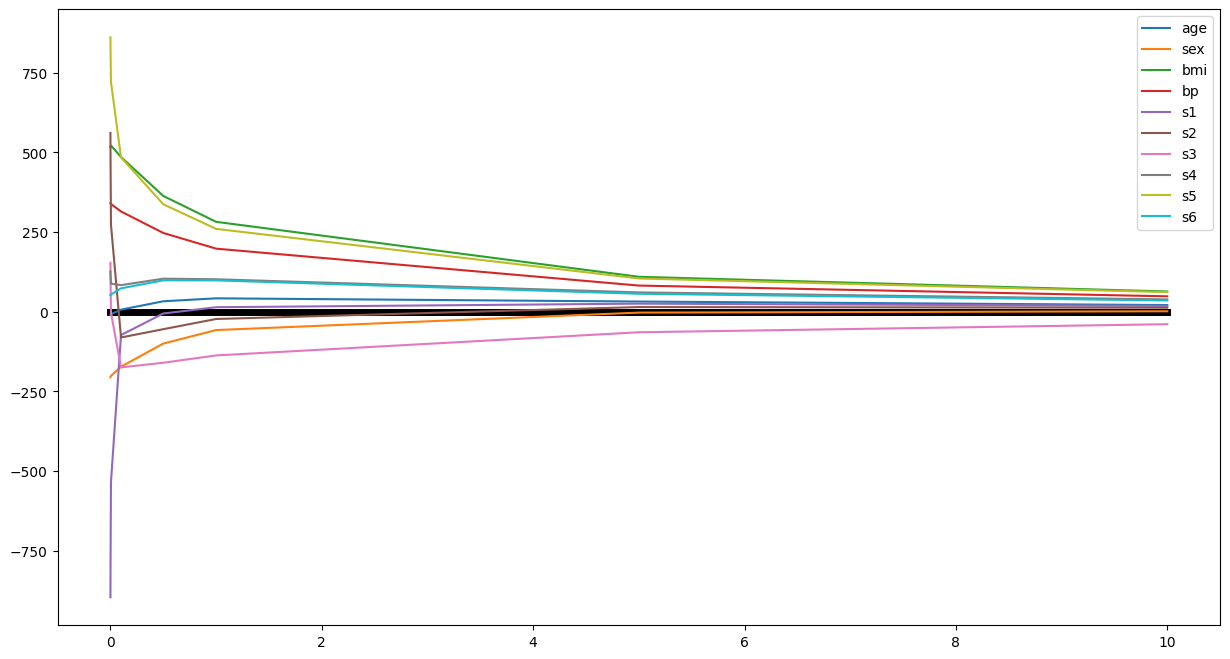

In [14]:
plt.figure(figsize=(15,8))
plt.plot(alphas,np.zeros(len(alphas)),color='black',linewidth=5)
for i in range(input_array.shape[0]):
    plt.plot(alphas,input_array[i],label=data.feature_names[i])
plt.legend()

## 3. Impact on Bias and Variance

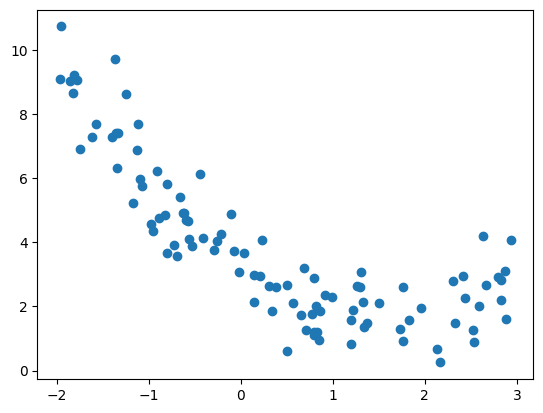

In [15]:
m = 100
X = 5 * np.random.rand(m, 1) - 2
y = 0.7 * X ** 2 - 2 * X + 3 + np.random.randn(m, 1)

plt.scatter(X, y)
plt.show()

In [16]:
X_train,X_test,y_train,y_test = train_test_split(X.reshape(100,1),y.reshape(100),test_size=0.2,random_state=2)

In [17]:
from sklearn.preprocessing import PolynomialFeatures
poly = PolynomialFeatures(degree=15)

X_train = poly.fit_transform(X_train)
X_test = poly.transform(X_test)

In [20]:
!pip install mlxtend

   ---------------------------------------- 0.0/1.4 MB ? eta -:--:--
   ------- -------------------------------- 0.3/1.4 MB ? eta -:--:--
   ------------------------------- -------- 1.0/1.4 MB 2.5 MB/s eta 0:00:01
   ---------------------------------------- 1.4/1.4 MB 2.8 MB/s eta 0:00:00


In [21]:
from mlxtend.evaluate import bias_variance_decomp

alphas = np.linspace(0,30,100)

loss = []
bias = []
variance = []

for i in alphas:
    reg = Ridge(alpha=i)
    avg_expected_loss, avg_bias, avg_var = bias_variance_decomp(
        reg, X_train, y_train, X_test, y_test, 
        loss='mse',
        random_seed=123)
    loss.append(avg_expected_loss)
    bias.append(avg_bias)
    variance.append(avg_var)

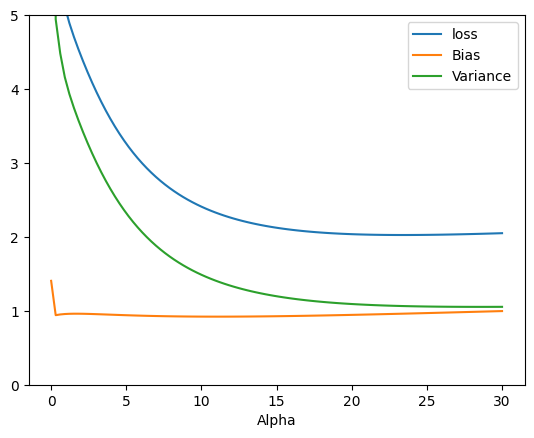

In [22]:
plt.plot(alphas,loss,label='loss')
plt.plot(alphas,bias,label='Bias')
plt.plot(alphas,variance,label='Variance')
plt.ylim(0,5)
plt.xlabel('Alpha')
plt.legend()

### 🎯 Impact of Ridge Regression on **Bias** and **Variance**

Ridge Regression adds **L2 regularization** to linear regression, which affects the **bias-variance tradeoff**:

---

### 🔵 1. **Bias Increases**

* Ridge **shrinks the model coefficients** (weights) toward 0.
* This makes the model **less flexible**, possibly underfitting the data slightly.
* → **Higher bias**, because it can’t fit the training data as closely.

---

### 🔴 2. **Variance Decreases**

* By shrinking the weights, Ridge makes the model **less sensitive to training data fluctuations**.
* So predictions become **more stable** on new data.
* → **Lower variance**, which means better generalization.

---

### 📈 Visual Summary:

| Model Type        | Bias       | Variance  |
| ----------------- | ---------- | --------- |
| Linear Regression | Low        | High      |
| Ridge Regression  | **Higher** | **Lower** |

---

### 🔍 In Practice:

* Use Ridge when **multicollinearity** or **overfitting** is a problem.
* The **\$\lambda\$ (regularization strength)** controls the tradeoff:

  * \$$lambda$$ = 0 → behaves like normal linear regression (low bias, high variance)
  * High \$\lambda\$ → more bias, less variance

---

Want an example or diagram to visualize this?


## 4. Effect of Regularization on Loss Function

[27.82809103]
-2.29474455867698


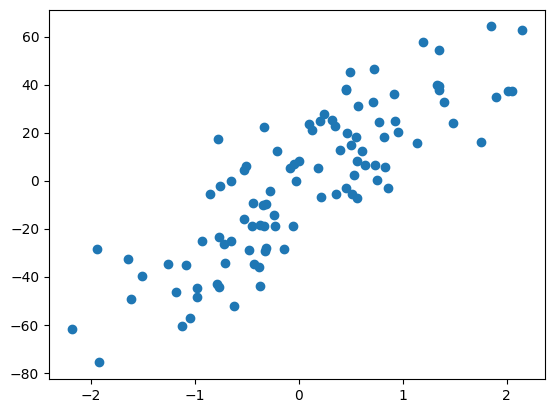

In [23]:
from sklearn.datasets import make_regression

X,y = make_regression(n_samples=100, n_features=1, n_informative=1, n_targets=1,noise=20,random_state=13)

plt.scatter(X,y)

from sklearn.linear_model import LinearRegression

reg = LinearRegression()
reg.fit(X,y)
print(reg.coef_)
print(reg.intercept_)

In [24]:
def cal_loss(m,alpha):
    return np.sum((y - m*X.ravel() + 2.29)**2) + alpha*m*m

In [25]:
def predict(m):
    return m*X - 2.29

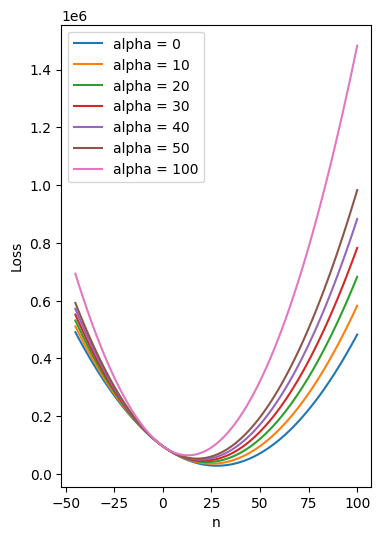

In [27]:
m = np.linspace(-45,100,100)
plt.figure(figsize=(4,6))
for j in [0,10,20,30,40,50,100]:
    loss = []
    for i in range(m.shape[0]):
        loss_i = cal_loss(m[i],j)
        loss.append(loss_i)
    plt.plot(m,loss,label='alpha = {}'.format(j))
plt.legend()
plt.xlabel('n')
plt.ylabel('Loss')
plt.show()

### for 2 coefficients
<img src='https://explained.ai/regularization/images/lagrange-animation.gif'>

## 5) Why called Ridge?

The name **“Ridge Regression”** comes from the **shape of the constraint region** it uses during optimization.

---

### 📐 Explanation:

In ordinary least squares (OLS), the goal is to minimize:

$$
J(\theta) = \sum_{i=1}^{n}(y^{(i)} - \theta^T x^{(i)})^2
$$

Ridge Regression modifies this by **adding a penalty** (L2 norm):

$$
J_{\text{ridge}}(\theta) = \sum_{i=1}^{n}(y^{(i)} - \theta^T x^{(i)})^2 + \lambda \|\theta\|_2^2
$$

This is equivalent to minimizing the OLS loss **subject to**:

$$
\|\theta\|_2^2 \leq t
$$

This constraint defines a **circular (or elliptical) region** in parameter space — called a **ridge** in early geometry literature.

---

### 🏔️ Geometric View:

* In high dimensions, the L2 ball looks like a **ridge-shaped contour** where the solution lies along **ridges** or **narrow valleys** of the error surface.
* The term “ridge” was first used by statisticians like **Hoerl and Kennard (1970)**, who introduced it as a solution to multicollinearity problems.

---

### 🧠 Intuition:

> “Ridge” describes the **regularized parameter space** where the solution is constrained — like a climber moving along a narrow ridge on a mountain, instead of wandering freely.

Would you like a visual of this?


Certainly! Here's a **formal and concise answer** suitable for an interview:

---

**Q: Why is it called Ridge Regression?**

**A:**
Ridge Regression gets its name from the geometry of the constraint it imposes. It adds an L2 regularization term to the linear regression loss, which penalizes large coefficients by minimizing the squared magnitude of the weights. This constraint defines a spherical or elliptical region in the parameter space. When this region intersects with the contours of the least squares error surface, the solution tends to lie along narrow, elongated valleys or "ridges." The term was popularized by Hoerl and Kennard in 1970 when they introduced Ridge Regression as a method to address multicollinearity in linear models.


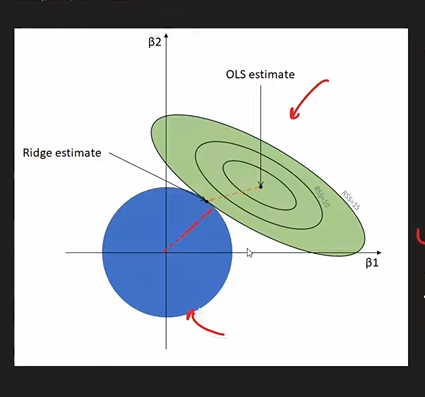